**Ziyi Zhang 1005282720**

# Homework #2 Part I: <br>Prove that as a function of $\theta$...

---

$$
\begin{align*}
&\color{white}{\propto}{} \exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] \\
&\propto{}  
\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)
\end{align*}$$

### Hint 1: expand the squares, and rebuild the quadratic in terms of $\theta$...
### Hint 2: anything that's not $\theta$ is a constant... and you can drop or multiply by any constants you want to complete the square...


**Solution:**

The expression given is:
$$\text{exp}\left\{-\frac{1}{2}\left(\left(\sum^n_{i=1}\phi(x_i-\theta)^2\right)+\tau(\theta-\theta_0)^2\right)\right\}$$
We want to prove that this is proportional to the Guassian distribution in terms of $\theta$.
First, let's expand the squred items inside the summation:
$$\sum^n_{i=1}\phi(x_i-\theta)^2 = \sum^n_{i=1}(x_i^2\phi - 2x_i\phi\theta + \phi\theta^2)$$
Now expand $\tau(\theta-\theta_0)^2$:
$$\tau(\theta-\theta_0)^2 = \tau\theta^2 - 2\tau\theta\theta_0 + \tau\theta_0^2$$
Combine the expansions:
$$\sum^n_{i=1}(x_i^2\phi - 2x_i\phi\theta + \phi\theta^2) + (\tau\theta^2 - 2\tau\theta\theta_0 + \tau\theta_0^2)= \phi\sum^n_{i=1}x_i^2-2\theta\phi\sum^n_{i=1}x_i+n\phi\theta^2+\tau\theta^2-2\tau\theta\theta_0+\tau\theta_0^2$$
Plugging the combined expansion back to our given expression:
$$\text{exp}\left\{-\frac{1}{2}\left(\left(\sum^n_{i=1}\phi(x_i-\theta)^2\right)+\tau(\theta-\theta_0)^2\right)\right\} =\text{exp}\left\{-\frac{1}{2}\left[\left(n\phi\theta^2+\tau\theta^2\right)+(-2\theta\phi\sum^n_{i=1}x_i-2\tau\theta\theta_0)+\phi\sum^n_{i=1}x_i^2+\tau\theta_0^2\right]\right\}$$
Since the constants that do not depend on $\theta$ do not affect the shape of the functions as a distribution of $\theta$, the last two terms in the expression above can be ignored:
$$\text{exp}\left\{-\frac{1}{2}\left(\left(\sum^n_{i=1}\phi(x_i-\theta)^2\right)+\tau(\theta-\theta_0)^2\right)\right\} \propto\text{exp}\left\{-\frac{1}{2}\left[\left(n\phi\theta^2+\tau\theta^2\right)+(-2\theta\phi\sum^n_{i=1}x_i-2\tau\theta\theta_0)\right]\right\}$$
Then group the liketerms together:
$$\begin{align*}
&\propto\text{exp}\left\{-\frac{1}{2}\left[\left(n\phi\theta^2+\tau\theta^2\right)+(-2\theta\phi\sum^n_{i=1}x_i-2\tau\theta\theta_0)\right]\right\} \\
&=\text{exp}\left\{-\frac{1}{2}\left[(\tau+n\phi)\theta^2-2\theta(\tau\theta_0+\phi\sum^n_{i=1}x_i)\right]\right\} 
\end{align*}$$
Take out $(\tau+n\phi)$ from the bracket terms:
$$\text{exp}\left\{-\frac{1}{2}\left[(\tau+n\phi)\theta^2-2\theta(\tau\theta_0+\phi\sum^n_{i=1}x_i)\right]\right\} =\text{exp}\left\{-\frac{1}{2}(\tau+n\phi)\left[\theta^2-\frac{2\theta}{\tau+n\phi}(\tau\theta_0+\phi\sum^n_{i=1}x_i)\right]\right\}$$
Then:
$$\begin{align*}
&\text{exp}\left\{-\frac{1}{2}(\tau+n\phi)\left[\theta^2-\frac{2\theta}{\tau+n\phi}(\tau\theta_0+\phi\sum^n_{i=1}x_i)\right]\right\} \\
&\propto\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2\right)\blacksquare
\end{align*}$$

# Homework #2 Part II: Complete the following... 

1. Make the "Classic Bayes" figure, but instead of a single likelihood, plot the individual likelihoods of each observation. *Hint: Consider the code...*
    
    ```python
    for xi in range(x):
        print(xi)
    ```     
2. Make the "Classic Bayes" figure for the normal-normal model on a log scale. *Hint: plot loglikehood, prior logpdf, and the log of the joint distribution using* `stats.norm.logpdf()`
    
3. What is the ***posterior distribution*** of a **normal likelihood** with $p(\theta) \propto 1$?
4. What's the difference between a ***log likelihood*** and ***log posterior*** when an ***improper prior*** is used? *Hint: is has something to do with the* ***log of the marginal likelihood constant***. [Or, another way to start thinking about this is to instead as the question: What's the difference between a ***likelihood*** and ***posterior*** when an ***improper prior*** is used? *Hint: is has something to do with the* ***marginal likelihood constant***.]

<!-- posterior proporitional to joint... --> 


**Question 1 Solution:**

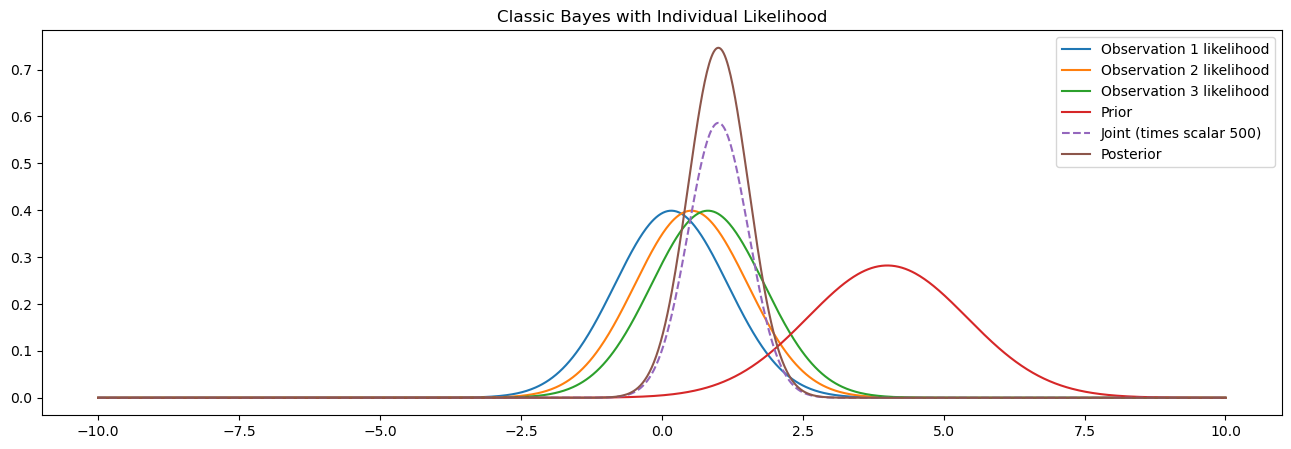

In [5]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Set seed
np.random.seed(365)

#Parameters
n = 3 # number of observations
theta_0, tau = 4, 1/2  # prior mean and precision
parameter_domain = np.linspace(-10, 10, 1001)  # theta values

# Generate observations from a normal distribution
observations = norm.rvs(loc=0, scale=1, size=n)

# Compute the individual likelihoods
individual_likelihoods = [norm.pdf(obs, loc=parameter_domain, scale=1) for obs in observations]

# Compute the prior distribution
prior_distribution = norm.pdf(parameter_domain, loc=theta_0, scale=1/np.sqrt(tau))

# Compute the joint likelihood (scaled for better visualization)
joint_likelihood = np.prod(individual_likelihoods, axis=0) * prior_distribution * 500

# Compute the posterior distribution
posterior_mean = (tau * theta_0 + np.sum(observations)) / (tau + n)
posterior_scale = np.sqrt(1 / (tau + n))
posterior_distribution = norm.pdf(parameter_domain, loc=posterior_mean, scale=posterior_scale)

# Plotting
plt.figure(figsize=(16, 5))
for i, likelihood in enumerate(individual_likelihoods, 1):
    plt.plot(parameter_domain, likelihood, label=f"Observation {i} likelihood")
plt.plot(parameter_domain, prior_distribution, label="Prior")
plt.plot(parameter_domain, joint_likelihood, linestyle = "--", label="Joint (times scalar 500)")
plt.plot(parameter_domain, posterior_distribution, label="Posterior")
plt.legend()
plt.title("Classic Bayes with Individual Likelihood")
plt.show()

**Question 2 Solution:**

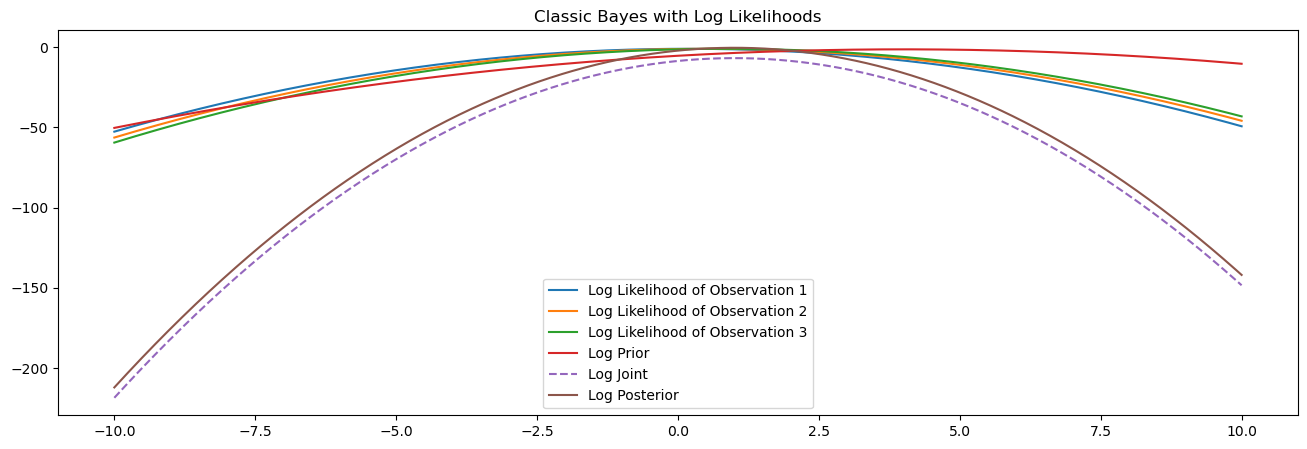

In [7]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(365)

# Parameters
n = 3  # number of observations
theta_0, tau = 4, 1/2  # prior mean and precision
parameter_domain = np.linspace(-10, 10, 1001)  # theta values

# Generate observations from a normal distribution
observations = norm.rvs(loc=0, scale=1, size=n)

# Compute the log of the individual likelihoods
log_individual_likelihoods = [norm.logpdf(obs, loc=parameter_domain, scale=1) for obs in observations]

# Compute the log of the prior distribution
log_prior_distribution = norm.logpdf(parameter_domain, loc=theta_0, scale=1/np.sqrt(tau))

# Compute the log of the joint likelihood (scaling it for better visualization might not be necessary in log-scale)
log_joint_likelihood = np.sum(log_individual_likelihoods, axis=0) + log_prior_distribution

# Compute the posterior distribution and its log
posterior_mean = (tau * theta_0 + np.sum(observations)) / (tau + n)
posterior_scale = np.sqrt(1 / (tau + n))
log_posterior_distribution = norm.logpdf(parameter_domain, loc=posterior_mean, scale=posterior_scale)

# Plotting
plt.figure(figsize=(16, 5))
for i, log_likelihood in enumerate(log_individual_likelihoods, 1):
    plt.plot(parameter_domain, log_likelihood, label=f"Log Likelihood of Observation {i}")
plt.plot(parameter_domain, log_prior_distribution, label="Log Prior")
plt.plot(parameter_domain, log_joint_likelihood, linestyle = "--", label="Log Joint")
plt.plot(parameter_domain, log_posterior_distribution, label="Log Posterior")
plt.legend()
plt.title("Classic Bayes with Log Likelihoods")
plt.show()

**Question 3 Solution:**

The posterior distribution of a parameter $\theta$ under a normal likelihood with a uniform prior is derived form Bayes' theorem. So the uniform prior $p(\theta) \propto 1$ suggests that all values of $\theta$ are considered equally likely before seeing the data.

Assuming we have data $X = {x_1, x_2, ..., x_n}$ that are normally distributed with mean $\theta$ and known variance $\sigma^2$, so the likelihood function is:
$$L(\theta|X) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i - \theta)^2}{2\sigma^2}}$$

The prior distribution $p(\theta) \propto 1$ indicates that all values of $\theta$ have the same prior probability. Note: it is a non-informative prior.

Then accoding the Bayes' theorem, the posterior distribution $p(\theta|X)$ is proportional to the likehood times the prior:
$$p(\theta|X) \propto L(\theta|X) \times p(\theta)$$

Given that the likelihood is normal and the prior is uniform, the posterior distribution is the normalized product of these two, which is a normal distribution. This is due to that the normal distribution is a conjugate prior for itself in the case of known variance, which means that the posterior distribution will have the same functional form as the prior dsitribution.

The mean of the posterior will be the sample mean of the data $\bar{x}$ and the variance will be $\frac{\sigma^2}{n}$, so the posterior distribution for $\theta$ will be:
$$\theta|X \sim N(\bar{x}, \frac{\sigma^2}{n})$$

Note: the posterior mean $\bar{x}$ is the average of the observed data, and the posterior variance $\frac{\sigma^2}{n}$ shrinks with the number of observations

**Question 4 Solution:**

The relationship between the likelihood, prior, and posterior is given by Bayes' theorem:
$$p(\theta|X) = \frac{p(X|\theta)p(\theta)}{p(X)}$$
Posterior distribution: $p(\theta|X)$;
Likelihood of the data given the parameter $\theta$: $p(X|\theta)$; 
Prior distribution: $p(\theta)$; 
Marginal likelihood: $p(X)$

When an improper prior is used, the marginal likelihood $p(X)$ becomes undefined constant because it involves integrating the product of the likelihood and improper prior over all parameter space.

The log likelihood is the natural logarithm of the likelihood fucntion $p(X|\theta)$, and these are unaffected by whether the choice prior is improper or proper.

The log posterior is the logarithm of the posterior distribution. If the prior is improper, the log posterior can still be computed up to a proportionality constance since the marginal likelihood $p(X)$ does not depend on $\theta$. Thus it becomes an additive constant that can be ignored for the purpose of parameter estimation:
$${log}(p(\theta|X)) \propto log(p(X|\theta))+log(p(\theta))-log(p(X))$$

Since an imporper prior is used, then $log(p(\theta)$ can be ommited because it's considered to be infinitly small:
$${log}(p(\theta|X)) \propto log(p(X|\theta)) - log(p(X))$$